### Cube Root Function
This cell has a function to find the cube root of a number, like finding what number cubed (times itself three times) gives your number.

In [12]:
# We need this to use a timer
import time

# This function finds the cube root, like what number times itself three times equals our number
def find_cube_root(number):
    # We use a tiny number to say how close we need to get to the answer
    epsilon = 0.000001
    
    # Count how many steps we take
    steps = 0
    
    # Start a timer to see how long it takes
    start_time = time.time()
    
    # If the number is zero, the cube root is zero, so we’re done
    if number == 0:
        return 0, 0, 0, 1  # Zero has 1 digit
    
    # Check if the number is negative (less than zero)
    is_negative = number < 0
    # If it’s negative, make it positive for now
    if is_negative:
        number = -number
    
    # Guess the cube root by picking a range
    # Start at 0 and go up to the number itself
    low = 0
    high = number
    
    # Our first guess is right in the middle
    guess = (low + high) / 2
    
    # Keep guessing until we’re super close
    # We check if guess * guess * guess is close to our number
    while abs(guess * guess * guess - number) > epsilon:
        # If our guess cubed is too small, we need a bigger guess
        if guess * guess * guess < number:
            low = guess
        # If our guess cubed is too big, we need a smaller guess
        else:
            high = guess
        # Try the middle of the new range
        guess = (low + high) / 2
        # Add 1 to our step count
        steps += 1
    
    # If the number was negative, make the cube root negative too
    if is_negative:
        guess = -guess
    
    # Stop the timer
    total_time = time.time() - start_time
    
    # Count how many digits in the number (like 123 has 3 digits)
    digits = len(str(number))
    
    # Give back the cube root, steps, time, and digits
    return guess, steps, total_time, digits

### Test Cube Root
This cell tries the cube root function on a few numbers and shows the results.

In [13]:
# Let’s try finding cube roots for lots of numbers
numbers = [-10000, -1000, -100, -10, -1, 0, 1, 10, 100, 1000, 10000]  # Big and small numbers
results = []  # A place to save our answers

# Go through each number
for num in numbers:
    # Get the cube root, steps, time, and digits
    root, steps, time_taken, digits = find_cube_root(num)
    # Save the answers
    results.append((root, steps, time_taken, digits))
    # Show what we found
    print(f"Number: {num}, Cube Root: {root:.4f}, Steps: {steps}, Digits: {digits}")

Number: -10000, Cube Root: -21.5443, Steps: 39, Digits: 5
Number: -1000, Cube Root: -10.0000, Steps: 36, Digits: 4
Number: -100, Cube Root: -4.6416, Steps: 30, Digits: 3
Number: -10, Cube Root: -2.1544, Steps: 24, Digits: 2
Number: -1, Cube Root: -1.0000, Steps: 21, Digits: 1
Number: 0, Cube Root: 0.0000, Steps: 0, Digits: 1
Number: 1, Cube Root: 1.0000, Steps: 21, Digits: 1
Number: 10, Cube Root: 2.1544, Steps: 24, Digits: 2
Number: 100, Cube Root: 4.6416, Steps: 30, Digits: 3
Number: 1000, Cube Root: 10.0000, Steps: 36, Digits: 4
Number: 10000, Cube Root: 21.5443, Steps: 39, Digits: 5


### Graph Results

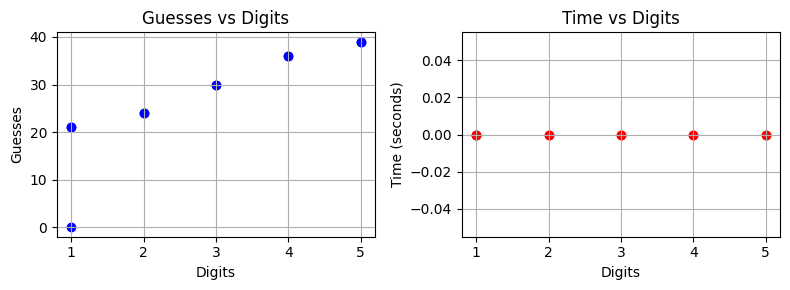

In [16]:
# We need this to make pictures
import matplotlib.pyplot as plt

# Get our answers from the tests
steps = [r[1] for r in results]  # How many guesses for each number
times = [r[2] for r in results]  # How long it took
digits = [r[3] for r in results]  # How many digits

# Make two pictures side by side
plt.figure(figsize=(8, 3))

# Picture 1: how many guesses vs. digits
plt.subplot(1, 2, 1)
plt.scatter(digits, steps, color='blue')  # Put dots for each number
plt.xlabel('Digits')  # Say what digits are
plt.ylabel('Guesses')  # Say what guesses are
plt.title('Guesses vs Digits')  # Name the picture
plt.grid(True)  # Add lines to make it clear

# Picture 2: how long it took vs. digits
plt.subplot(1, 2, 2)
plt.scatter(digits, times, color='red')  # Dots for time
plt.xlabel('Digits')  # Digits again
plt.ylabel('Time (seconds)')  # Time taken
plt.title('Time vs Digits')  # Name it
plt.grid(True)

# Show both pictures
plt.tight_layout()
plt.show()

### Prime Number Checker
This checks if a number is prime (only divisible by 1 and itself).

In [7]:
# This checks if a number is prime, like 3 or 5, which only divide by 1 and themselves
def is_prime(n):
    # Count how many times we check
    steps = 0
    
    # Numbers less than 2 aren’t prime
    if n < 2:
        return False, 0
    
    # Try dividing by numbers up to a small number (like a shortcut)
    for i in range(2, int(n ** 0.5) + 1):
        steps += 1
        # If it divides evenly, it’s not prime
        if n % i == 0:
            return False, steps
    
    # If we didn’t find any dividers, it’s prime
    return True, steps

### Sum Prime Numbers
This finds primes from 3 to 1000, adds them up, and saves data for graphs.

In [8]:
# We need this for a math shortcut
import math

# Add up all prime numbers from 3 to 1000
prime_sum = 0  # Start with zero
prime_data = []  # Save our answers

# Check every number from 3 to 1000
for n in range(3, 1001):
    # Start a timer
    start_time = time.time()
    # See if it’s prime
    is_prime_n, steps = is_prime(n)
    # Stop the timer
    time_taken = time.time() - start_time
    
    # If it’s prime, add it to our total
    if is_prime_n:
        prime_sum += n
        # Count digits (like 13 has 2 digits)
        digits = len(str(n))
        # Save steps, time, and digits
        prime_data.append((steps, time_taken, digits))

# Show the total
print(f"Sum of primes from 3 to 1000: {prime_sum}")

Sum of primes from 3 to 1000: 76125


### Graph Prime Results
This makes graphs for the prime number checks.


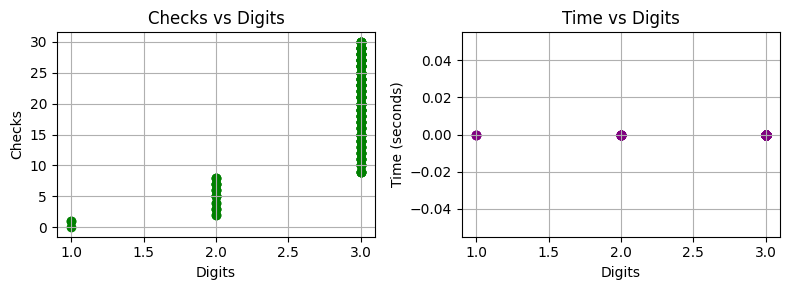

In [9]:
# We need this to make pictures
import matplotlib.pyplot as plt

# Get our saved answers
prime_steps = [d[0] for d in prime_data]  # How many checks
prime_times = [d[1] for d in prime_data]  # How long it took
prime_digits = [d[2] for d in prime_data]  # How many digits

# Make two pictures
plt.figure(figsize=(8, 3))

# Picture 1: checks vs. digits
plt.subplot(1, 2, 1)
plt.scatter(prime_digits, prime_steps, color='green')  # Green dots
plt.xlabel('Digits')  # Digits on the bottom
plt.ylabel('Checks')  # Checks on the side
plt.title('Checks vs Digits')  # Name the picture
plt.grid(True)  # Add lines to see better

# Picture 2: time vs. digits
plt.subplot(1, 2, 2)
plt.scatter(prime_digits, prime_times, color='purple')  # Purple dots
plt.xlabel('Digits')  # Digits again
plt.ylabel('Time (seconds)')  # Time on the side
plt.title('Time vs Digits')  # Name it
plt.grid(True)

# Show the pictures
plt.tight_layout()
plt.show()

### Egg-Dropping Function
This finds the highest floor where an egg doesn’t break.

In [10]:
# Find the highest floor where an egg stays safe
def egg_drop(floors=102, max_eggs=7, break_floor=50):
    # Count eggs and drops
    eggs_used = 0
    drops = 0
    
    # Start at floor 1, go up to 102
    low = 1
    high = floors
    
    # Jump floors like steps on a ladder
    step = 15
    
    # Keep dropping eggs until we use too many or find the answer
    while eggs_used < max_eggs and low <= high:
        # Use one egg
        eggs_used += 1
        # Pick a floor to drop from
        drop_floor = min(low + step - 1, high)
        # Count the drop
        drops += 1
        
        # Pretend the egg breaks at break_floor or higher
        if drop_floor >= break_floor:
            # If it breaks, try lower floors
            high = drop_floor - 1
        else:
            # If it doesn’t break, try higher floors
            low = drop_floor + 1
        
        # Make the step smaller
        step = max(1, (high - low) // (max_eggs - eggs_used + 1))
        
        # Stop if we’re super close
        if high - low <= 1:
            break
    
    # The safe floor is just below where it breaks
    safe_floor = low - 1
    # Show what we found
    print(f"Eggs used: {eggs_used}, Drops: {drops}, Safe Floor: {safe_floor}")
    return safe_floor

### Test Egg-Dropping
This runs the egg-dropping game.

In [11]:
# Play the egg-dropping game
egg_drop()

Eggs used: 7, Drops: 7, Safe Floor: 46


46

### Software Testing Function


In [19]:
# Find the smallest number that makes a program stop working
def test_input(max_value=100, max_tests=7, fail_value=50):
    # Count how many tests
    tests_used = 0
    
    # Start at 1, go up to 100
    low = 1
    high = max_value
    
    # Jump numbers like steps
    step = 15
    
    # Keep testing until we use too many tests
    while tests_used < max_tests and low <= high:
        # Do one test
        tests_used += 1
        # Pick a number
        test_value = min(low + step - 1, high)
        
        # Pretend it breaks at fail_value or higher
        if test_value >= fail_value:
            # If it breaks, try smaller numbers
            high = test_value - 1
        else:
            # If it doesn’t break, try bigger numbers
            low = test_value + 1
        
        # Make the step smaller
        step = max(1, (high - low) // (max_tests - tests_used + 1))
        
        # Stop if we’re close
        if high - low <= 1:
            break
    
    # The breaking number
    fail_input = low
    # Show what we found
    print(f"Tests used: {tests_used}, Breaking Number: {fail_input}")
    return fail_input

### Test Software Scenario

In [20]:
# Try the software test
test_input()

Tests used: 7, Breaking Number: 47


47